In [4]:
# Importing Libraries 
import numpy as np 
import pandas as pd 

# Import dataset 
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t') 

dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
#REMOVING PUNCTUATIONS
#REMOVING STOPWORDS
#STEMMING


# library to clean data 
import re 

# Natural Language Tool Kit 
import nltk 

#nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
corpus = [] 



# 1000 (reviews) rows to clean 
for i in range(0, 1000): 
    # column : "Review", row ith ()
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
    
    # convert all cases to lower cases
    review = review.lower() 
    
    # split to array(default delimiter is " ") 
    review = review.split() 
    
    
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer() 
    
    # loop for stemming each word 
    # in string array at ith row
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    #print(review)
    
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review) 
    #print(review)
    
    # append each string to create 
    # array of clean text 
    corpus.append(review) 

    
#corpus

In [3]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features=1000) 

# X contains corpus (dependent variable) 

cv.fit(corpus)

X = cv.transform(corpus)

print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'anoth', 'anyon', 'anyth', 'anytim', 'anyway', 'apolog', 'appet', 'area', 'around', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'beat', 'beauti', 'becom', 'beef', 'beer', 'behind', 'believ', 'belli', 'best', 'better', 'beyond', 'big', 'bill', 'biscuit', 'bisqu', 'bit', 'bite', 'black', 'bla

In [148]:
X=X.toarray() 

print(X)

# y contains answers if review 
# is positive or negative 

y = dataset.iloc[:, 1].values 

print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 

In [149]:
# Splitting the dataset into 
# the Training set and Test set 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 


In [150]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model1 = RandomForestClassifier(n_estimators = 501, 
							criterion = 'entropy') 
							
model1.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
# Predicting the Test set results
#RANDOM FOREST
y_pred1 = model1.predict(X_test) 
#y_pred1 


In [152]:
from sklearn.metrics import accuracy_score 
accuracy1=accuracy_score(y_test, y_pred1)
accuracy1

0.748

In [153]:
# Making the Confusion Matrix of RANDOM FOREST
from sklearn.metrics import confusion_matrix 

cm1 = confusion_matrix(y_test, y_pred1) 
cm1    

#    P   P
#A   tp fn
#A   fp tn


array([[105,  23],
       [ 40,  82]], dtype=int64)

In [154]:
#RANDOM FOREST ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       128
           1       0.78      0.67      0.72       122

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250



In [155]:
#NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB().fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

#y_pred2

In [156]:
# Making the Confusion Matrix of NAIVE BAYES
from sklearn.metrics import confusion_matrix 

cm2 = confusion_matrix(y_test, y_pred2) 
cm2    


array([[105,  23],
       [ 30,  92]], dtype=int64)

In [157]:
#NAIVE BAYES ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       128
           1       0.80      0.75      0.78       122

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [158]:
from sklearn.metrics import accuracy_score 
accuracy2=accuracy_score(y_test, y_pred2)
accuracy2

0.788

In [159]:
#SVM
from sklearn.svm import LinearSVC

model3 = LinearSVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

#y_pred3

In [160]:
# Making the Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix 

cm3 = confusion_matrix(y_test, y_pred3) 
cm3    


array([[104,  24],
       [ 33,  89]], dtype=int64)

In [161]:
#SVM ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       128
           1       0.79      0.73      0.76       122

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [162]:
from sklearn.metrics import accuracy_score 
accuracy3=accuracy_score(y_test, y_pred3)
accuracy3

0.772

In [163]:
#LR
from sklearn.linear_model import LogisticRegression
model4= LogisticRegression()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

#y_pred4

C:\Users\fizas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [164]:
#LR Confusion matrix
from sklearn.metrics import confusion_matrix 

cm4 = confusion_matrix(y_test, y_pred4) 
cm4    


array([[106,  22],
       [ 35,  87]], dtype=int64)

In [165]:
#LR Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       128
           1       0.80      0.71      0.75       122

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [166]:
from sklearn.metrics import accuracy_score 
accuracy4=accuracy_score(y_test, y_pred4)
accuracy4

0.772

In [167]:
# decision tree
from sklearn import tree
model5 = tree.DecisionTreeClassifier()
model5.fit(X_train, y_train)
y_pred5= model5.predict(X_test)

In [168]:
#DT Confusion matrix
from sklearn.metrics import confusion_matrix 

cm5 = confusion_matrix(y_test, y_pred5) 
cm5

array([[97, 31],
       [46, 76]], dtype=int64)

In [169]:
#DT Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       128
           1       0.71      0.62      0.66       122

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



In [170]:
from sklearn.metrics import accuracy_score 
accuracy5=accuracy_score(y_test, y_pred5)
accuracy5

0.692

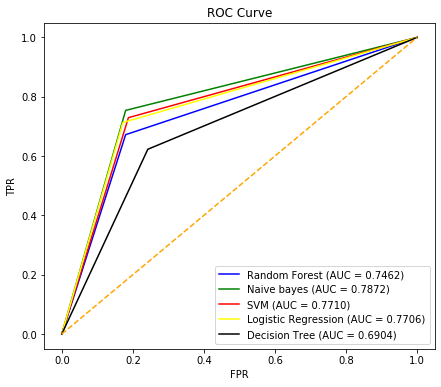

In [171]:
# ROC Curve


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, _ = roc_curve(y_test,  y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)

plt.figure(figsize=(7, 6))
plt.plot(fpr1, tpr1, color='blue',
label='Random Forest (AUC = %0.4f)' % auc1)
plt.legend(loc='lower right')

fpr2, tpr2, _ = roc_curve(y_test,  y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
plt.plot(fpr2, tpr2, color='green',
label='Naive bayes (AUC = %0.4f)' % auc2)
plt.legend(loc='lower right')

fpr3, tpr3, _ = roc_curve(y_test,  y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)
plt.plot(fpr3, tpr3, color='red',
label='SVM (AUC = %0.4f)' % auc3)
plt.legend(loc='lower right')

fpr4, tpr4, _ = roc_curve(y_test,  y_pred4)
auc4 = roc_auc_score(y_test, y_pred4)
plt.plot(fpr4, tpr4, color='yellow',
label='Logistic Regression (AUC = %0.4f)' % auc4)
plt.legend(loc='lower right')

fpr5, tpr5, _ = roc_curve(y_test,  y_pred5)
auc5 = roc_auc_score(y_test, y_pred5)
plt.plot(fpr5, tpr5, color='black',
label='Decision Tree (AUC = %0.4f)' % auc5)
plt.legend(loc='lower right')

plt.plot([0,1], [0,1], color='orange', linestyle='--')



plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [206]:
# library to clean data 
import re 

# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 


# Natural Language Tool Kit 
import nltk 

#nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
Textcorpus = []

def funcTest(text):
    text= re.sub('[^a-zA-Z]', ' ',text) 
    
    # convert all cases to lower cases
    text = text.lower() 
    
    # split to array(default delimiter is " ") 
    text = text.split() 
    
    
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer() 
    
    # loop for stemming each word 
    # in string array at ith row
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))] 
    #print(review)
    
    # rejoin all string array elements 
    # to create back into a string 
    text = ' '.join(text) 
    #print(review)
    
    # append each string to create 
    # array of clean text 
    Textcorpus.append(text) 

    cv = CountVectorizer(max_features=1000) 
    # X contains corpus (dependent variable) 
    cv.fit(Textcorpus)
    
    list3=[]
    TestText = cv.transform(Textcorpus)
    list3=cv.get_feature_names()
    
    TestText=TestText.toarray() 
    
    return list3


In [207]:
print(cv.get_feature_names()[0])

absolut


In [208]:
import numpy as np
list1=[]
for n in range(1000):
    temp=cv.get_feature_names()[n]
    list1.append(temp)
    
array1=np.array(list1)


In [209]:
t1=funcTest('worst experience, bad taste')
#t1=funcTest('I really liked the food, amazing taste')

print(t1)

['bad', 'experi', 'tast', 'worst']


In [210]:
import pandas as pd
df=pd.DataFrame(columns=array1)
df.head()

,absolut,absolutley,accid,accommod,accomod,accordingli,account,acknowledg,across,actual,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero


In [211]:
list2=[]
list2=t1
list2

['bad', 'experi', 'tast', 'worst']

In [212]:
len(array1)

1000

In [213]:
for index in range(len(array1)):
    if df.columns[index] in list2:
        df.loc[0,df.columns[index]]=1
    else:
        df.loc[0,df.columns[index]]=0

In [214]:
df.head()

,absolut,absolutley,accid,accommod,accomod,accordingli,account,acknowledg,across,actual,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Columns: 1000 entries, absolut to zero
dtypes: int64(1000)
memory usage: 7.9 KB


In [216]:
df.iloc[0,:]

absolut       0
absolutley    0
accid         0
accommod      0
accomod       0
             ..
yucki         0
yukon         0
yum           0
yummi         0
zero          0
Name: 0, Length: 1000, dtype: int64

In [217]:
for value in range(len(df.columns)):
    if df.loc[0,df.columns[value]]==1:
        print(df.loc[0,df.columns[value]])
        print(df.columns[value],value)
    else:
        pass

1
bad 66
1
experi 328
1
tast 844
1
worst 978


In [218]:
my_temp=df.to_numpy()

In [219]:
t1=model1.predict(my_temp)
t1

array([0], dtype=int64)

In [220]:
t2=model2.predict(my_temp)
t2

array([0], dtype=int64)

In [221]:
t3=model3.predict(my_temp)
t3

array([0], dtype=int64)

In [222]:
t4=model4.predict(my_temp)
t4

array([0], dtype=int64)

In [223]:
t5=model5.predict(my_temp)
t5

array([0], dtype=int64)